**Import usefull libraries**

In [1]:
import pandas as pd
import numpy as np

from numpy import mean
from numpy import median
from statistics import mode

import matplotlib.pyplot as plt
import seaborn as sns

**Load dataset**

In [4]:
df = pd.read_csv('data/bitcoin.csv', index_col='time')
print(df.shape)
df.head()

(184, 9)


,low,high,open,close,volume,greed_and_fear,google_trend,sentiment_medio,difficulty
time,,,,,,,,,
2022-12-11,17073.19,17271.92,17128.10,17085.21,9948.852670,26,30,0.057855,3.424433e+13
2022-12-10,17093.42,17227.64,17130.49,17128.10,7860.586876,27,28,0.023664,3.424433e+13
2022-12-09,17060.69,17352.62,17226.03,17130.59,20976.636999,26,28,0.079547,3.424433e+13
2022-12-08,16738.00,17300.59,16839.76,17226.01,23533.234537,25,28,0.098894,3.424433e+13
2022-12-07,16679.52,17140.22,17089.18,16840.00,22635.468488,29,28,0.098525,3.424433e+13


**descriptive analysis**

In [8]:
null = df.isnull().sum()
duplicate = df.duplicated().sum()
print(null)
print(r'valori doppi: ', duplicate)

low                0
high               0
open               0
close              0
volume             0
greed_and_fear     0
google_trend       0
sentiment_medio    0
difficulty         0
dtype: int64
valori doppi:  0


In [9]:
df.dtypes

low                float64
high               float64
open               float64
close              float64
volume             float64
greed_and_fear       int64
google_trend         int64
sentiment_medio    float64
difficulty         float64
dtype: object

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
low,184.0,1.969655e+04,2.209816e+03,1.546000e+04,1.866219e+04,1.960547e+04,2.088712e+04,2.808001e+04
high,184.0,2.065573e+04,2.412420e+03,1.627999e+04,1.945190e+04,2.046761e+04,2.185821e+04,2.941111e+04
open,184.0,2.021675e+04,2.329571e+03,1.575896e+04,1.914818e+04,2.012302e+04,2.141581e+04,2.905879e+04
close,184.0,2.015184e+04,2.246700e+03,1.576014e+04,1.913067e+04,2.010408e+04,2.137490e+04,2.838863e+04
volume,184.0,2.634357e+04,1.550360e+04,7.044990e+03,1.662337e+04,2.365199e+04,3.275831e+04,1.196340e+05
greed_and_fear,184.0,2.436957e+01,8.011900e+00,6.000000e+00,2.000000e+01,2.400000e+01,2.900000e+01,4.700000e+01
google_trend,184.0,4.016304e+01,1.627212e+01,2.500000e+01,3.000000e+01,3.500000e+01,4.800000e+01,1.000000e+02
sentiment_medio,184.0,7.779380e-02,3.200062e-02,-2.216693e-04,5.717840e-02,7.175841e-02,9.552775e-02,1.991396e-01
difficulty,184.0,3.196783e+13,3.388530e+12,2.769257e+13,2.915280e+13,3.097705e+13,3.561079e+13,3.695049e+13


In [11]:
df.corr()

,low,high,open,close,volume,greed_and_fear,google_trend,sentiment_medio,difficulty
low,1.000000,0.958980,0.963702,0.978126,-0.303261,0.349818,0.138458,0.141537,-0.695894
high,0.958980,1.000000,0.984597,0.971768,-0.093474,0.252643,0.298001,0.082477,-0.718587
open,0.963702,0.984597,1.000000,0.951564,-0.142436,0.277604,0.271047,0.099934,-0.699121
close,0.978126,0.971768,0.951564,1.000000,-0.221816,0.283981,0.205411,0.105824,-0.719886
volume,-0.303261,-0.093474,-0.142436,-0.221816,1.000000,-0.108838,0.195427,-0.217978,0.248632
greed_and_fear,0.349818,0.252643,0.277604,0.283981,-0.108838,1.000000,-0.553700,0.271384,-0.030629
google_trend,0.138458,0.298001,0.271047,0.205411,0.195427,-0.553700,1.000000,-0.172150,-0.296080
sentiment_medio,0.141537,0.082477,0.099934,0.105824,-0.217978,0.271384,-0.172150,1.000000,-0.006705
difficulty,-0.695894,-0.718587,-0.699121,-0.719886,0.248632,-0.030629,-0.296080,-0.006705,1.000000


In [18]:
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return col[(col < lower_bound) | (col > upper_bound)]

df.apply(detect_outliers)

,low,high,open,close,volume,greed_and_fear,google_trend,sentiment_medio,difficulty
time,,,,,,,,,
2022-06-11,28080.01,29411.11,29058.79,28388.63,NaN,NaN,NaN,NaN,NaN
2022-06-12,26532.95,28516.33,28395.03,26555.20,NaN,NaN,100.0,NaN,NaN
2022-06-13,NaN,26869.35,26555.17,NaN,81724.844694,NaN,100.0,NaN,NaN
2022-06-14,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2022-06-15,NaN,NaN,NaN,NaN,62040.453455,NaN,100.0,NaN,NaN
2022-06-16,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2022-06-17,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN
2022-06-18,NaN,NaN,NaN,NaN,NaN,6.0,100.0,NaN,NaN
2022-06-19,NaN,NaN,NaN,NaN,NaN,6.0,76.0,NaN,NaN


**Plotting**

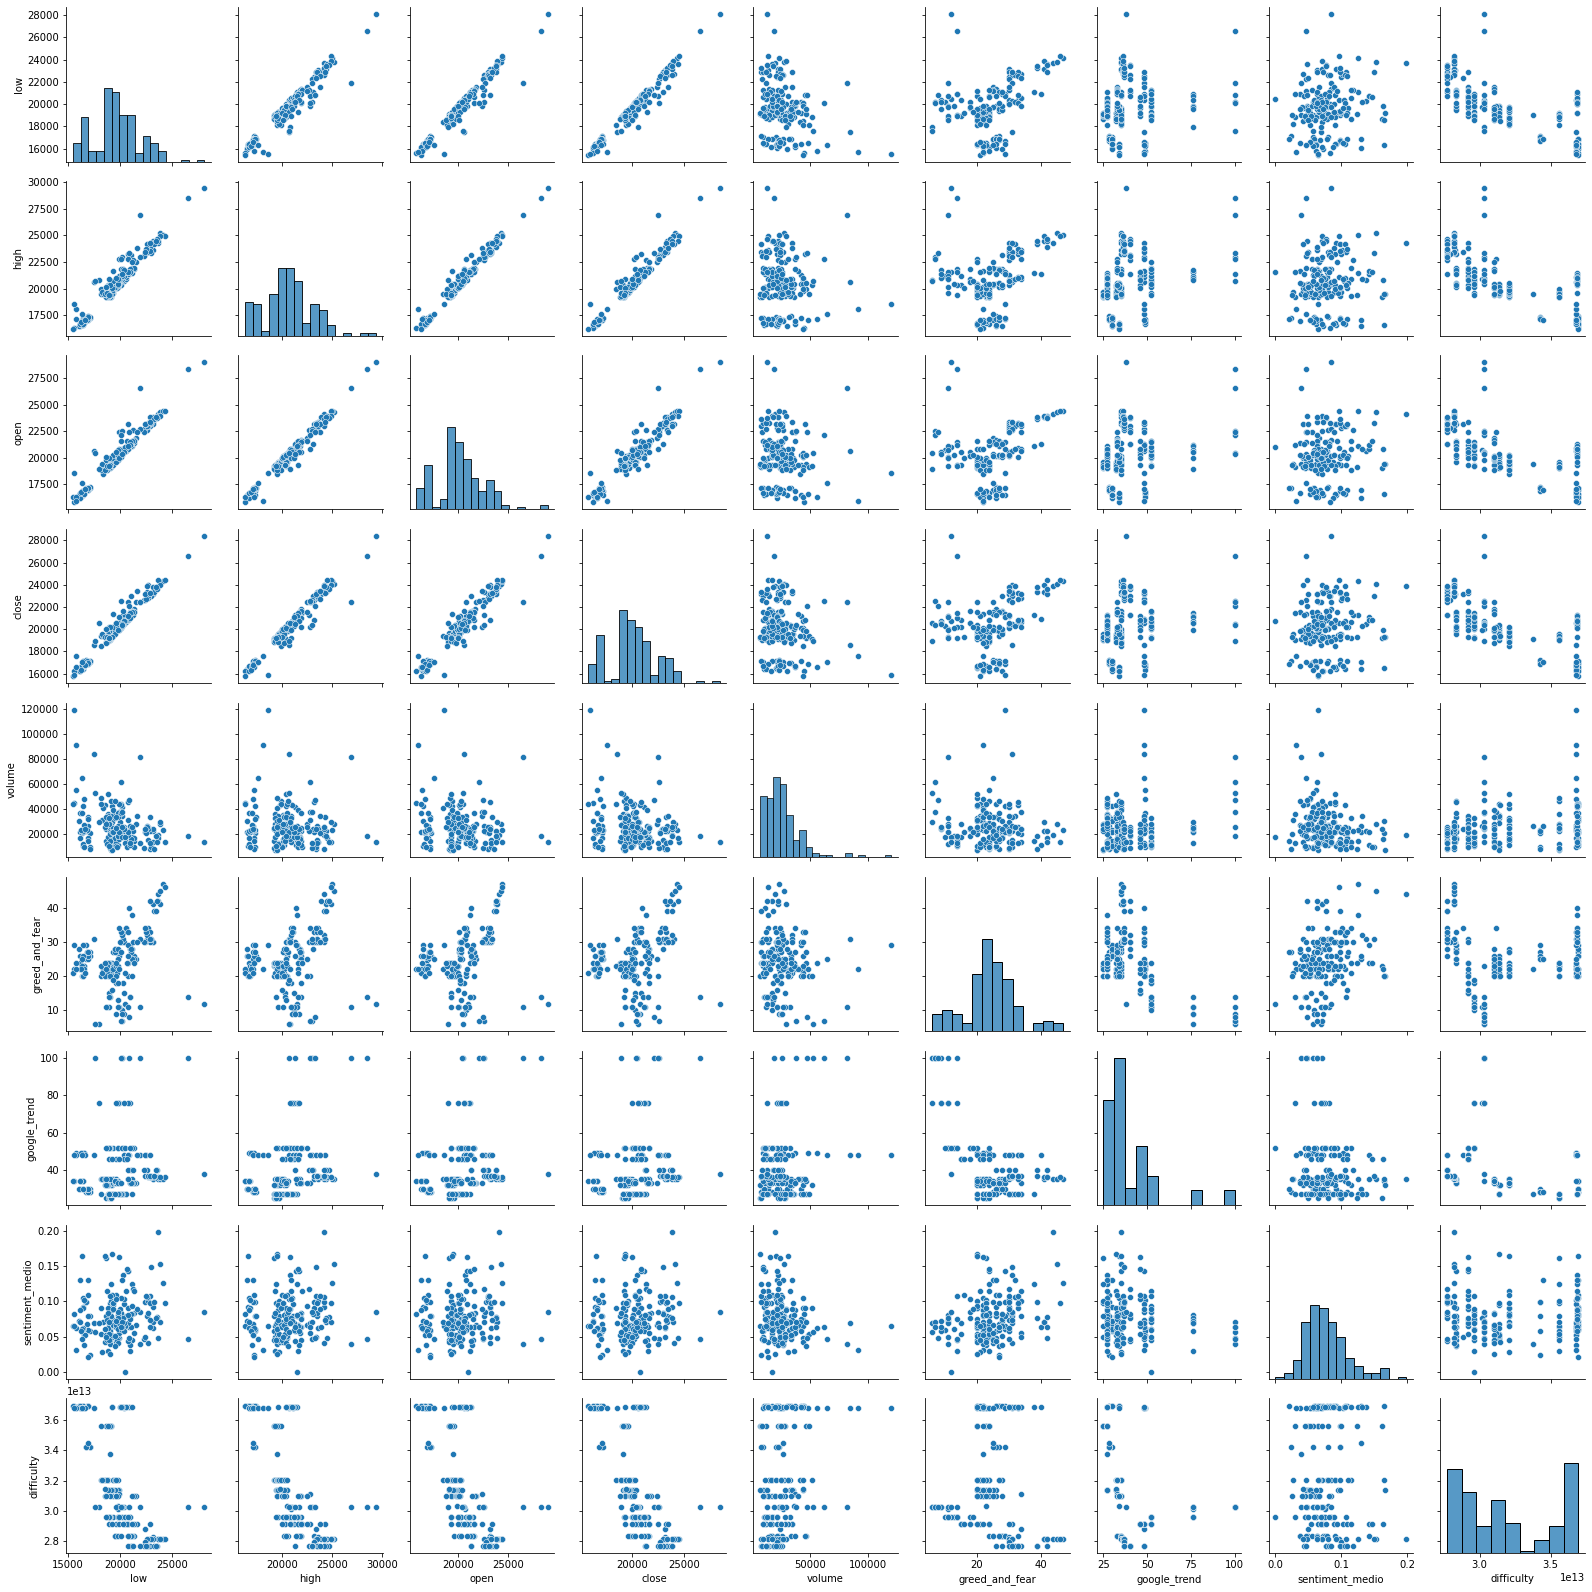

In [12]:
sns.pairplot(df);

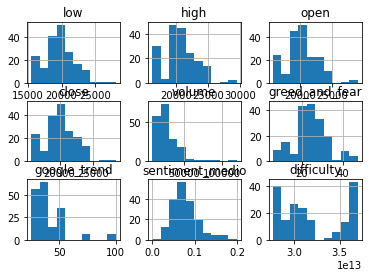

In [14]:
df.hist();

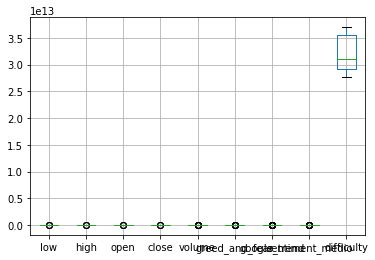

In [15]:
df.boxplot();

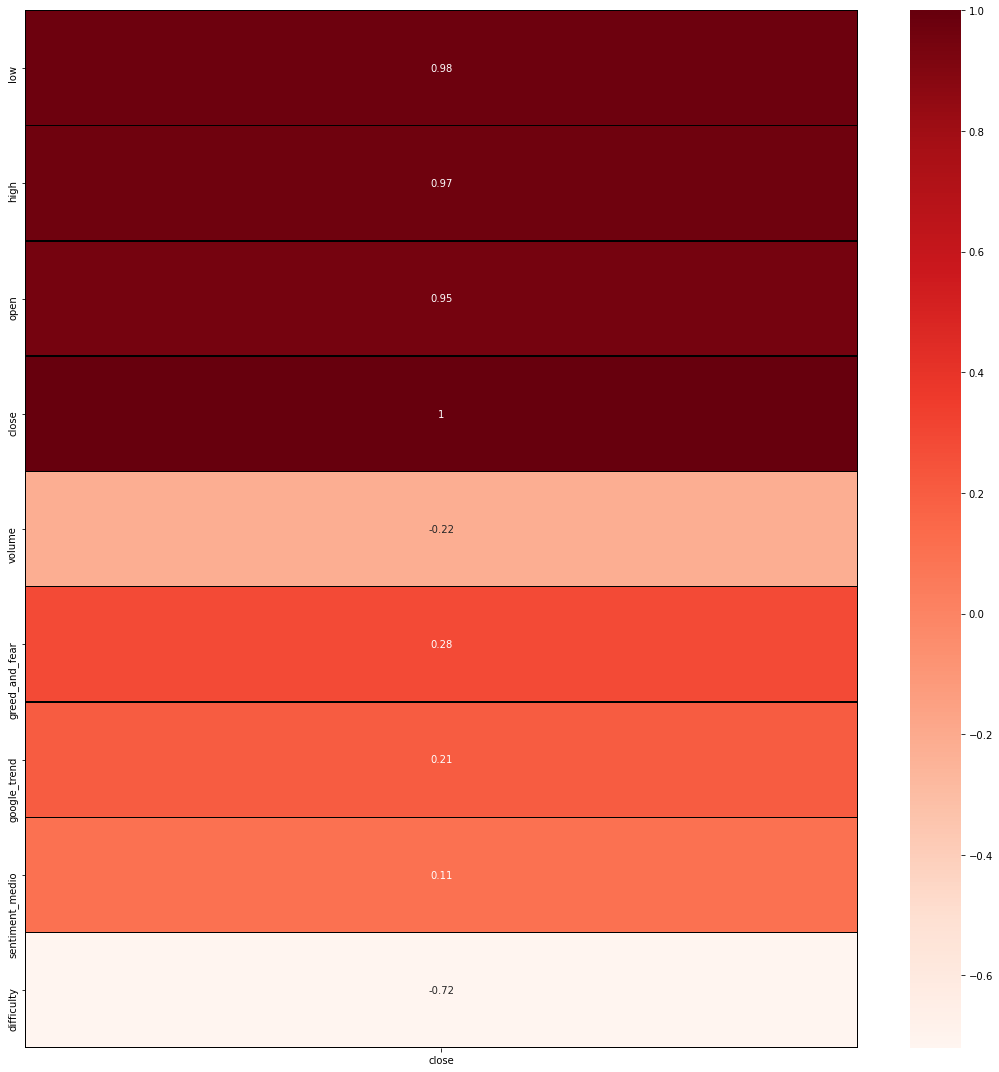

In [19]:
df_corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr[["close"]], cmap="Reds", annot=True, linewidths=0.5,linecolor="Black")
plt.tight_layout()
plt.show()

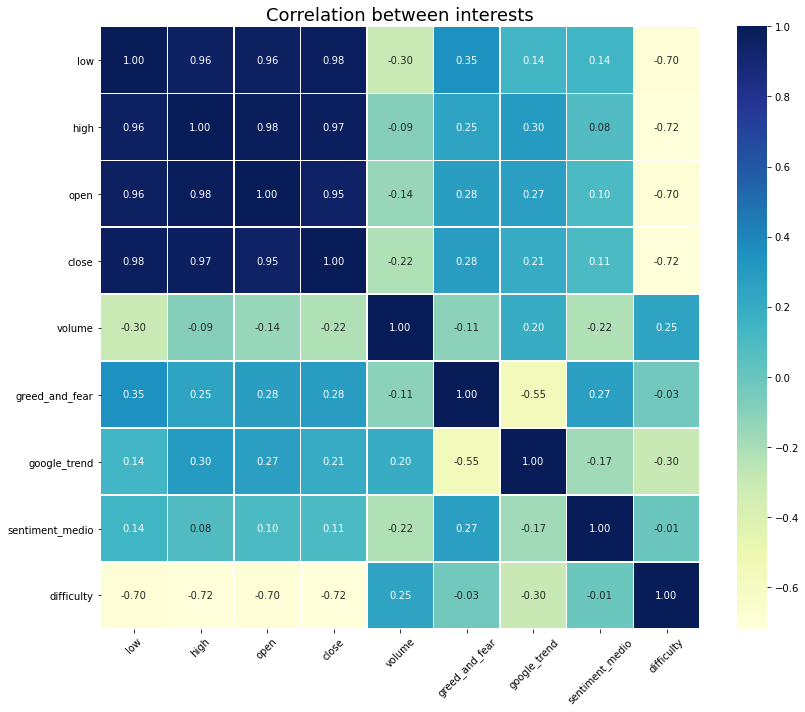

In [20]:
corr = df.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, cmap='YlGnBu', annot=True, linewidths=0.5, fmt=".2f")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)
plt.tight_layout()
plt.show()